In [1]:
# Extract top 300 symbols from Coinmarketcap (approx. those having mkt cap > $70M)

from binance.client import Client as bnb_client
from binance.exceptions import BinanceAPIException
from datetime import datetime
import pandas as pd
import numpy as n
import requests

api_key = '3131be61-4d8c-4eb4-9d15-153cdc27525d'
url = f'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?start=1&limit=300&convert=USD'

headers = {
    'X-CMC_PRO_API_KEY': api_key
}

response = requests.get(url, headers=headers)

# Checking if the request was successful
if response.status_code == 200:
    # Extract the data from the response JSON
    data = response.json()

    # Access the list of cryptocurrencies and their details
    cryptocurrencies = data['data']

    # Create lists to store the data
    coin_names = []
    coin_symbols = []
    market_caps = []

    # Process and use the cryptocurrency data as needed
    for crypto in cryptocurrencies:
        coin_name = crypto['name']
        coin_symbol = crypto['symbol']
        market_cap = crypto['quote']['USD']['market_cap']

        # Convert market cap to billions or millions and add B or M accordingly
        if market_cap >= 1e9:  # If market cap is in billions
            market_cap_str = f"{market_cap / 1e9:.2f}B"
        elif market_cap >= 1e6:  # If market cap is in millions
            market_cap_str = f"{market_cap / 1e6:.2f}M"
        else:
            market_cap_str = f"{market_cap:.2f}"

        # Append the data to the lists
        coin_names.append(coin_name)
        coin_symbols.append(coin_symbol)
        market_caps.append(market_cap_str)

    # Create a DataFrame from the lists
    coin_data = pd.DataFrame({
        'Name': coin_names,
        'Symbol': coin_symbols,
        'Market Cap (USD)': market_caps
    })

    print(coin_data)

else:
    print(f"Error: {response.status_code} - {response.json()['status']['error_message']}")
    

symbols = coin_data['Symbol'].tolist()
univ = [symbol + 'USDT' for symbol in symbols]

print(univ)


                   Name Symbol Market Cap (USD)
0               Bitcoin    BTC          571.64B
1              Ethereum    ETH          221.86B
2           Tether USDt   USDT           83.42B
3                   BNB    BNB           36.97B
4                   XRP    XRP           33.56B
..                  ...    ...              ...
295               Ardor   ARDR           73.70M
296         Wrapped NXM   WNXM           73.67M
297    Energy Web Token    EWT           73.46M
298  Hifi Finance (Old)    MFT           71.85M
299            MetisDAO  METIS           71.02M

[300 rows x 3 columns]
['BTCUSDT', 'ETHUSDT', 'USDTUSDT', 'BNBUSDT', 'XRPUSDT', 'USDCUSDT', 'DOGEUSDT', 'ADAUSDT', 'SOLUSDT', 'TRXUSDT', 'MATICUSDT', 'LTCUSDT', 'DOTUSDT', 'SHIBUSDT', 'DAIUSDT', 'WBTCUSDT', 'BCHUSDT', 'TONUSDT', 'AVAXUSDT', 'LINKUSDT', 'XLMUSDT', 'LEOUSDT', 'UNIUSDT', 'BUSDUSDT', 'TUSDUSDT', 'ATOMUSDT', 'OKBUSDT', 'XMRUSDT', 'ETCUSDT', 'HBARUSDT', 'FILUSDT', 'ICPUSDT', 'LDOUSDT', 'APTUSDT', 'MNTUSDT', '

In [2]:
# GETTING WEEKLY DATA FOR COINS

from binance.client import Client as bnb_client
from binance.exceptions import BinanceAPIException
from datetime import datetime
import pandas as pd

# Use bnb_client(tld='US') for users in the United States
client = bnb_client(tld='US')

def get_binance_px(symbol, freq, start_ts='2020-01-01'):
    try:
        data = client.get_historical_klines(symbol, '1d', start_ts)
        columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume',
                   'num_trades', 'taker_base_volume', 'taker_quote_volume', 'ignore']

        data = pd.DataFrame(data, columns=columns)

        # Convert from POSIX timestamp (number of milliseconds since Jan 1, 1970)
        data['open_time'] = data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
        data['close_time'] = data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
        data.set_index('open_time', inplace=True)

        # Convert data to numeric
        data = data.apply(pd.to_numeric, errors='coerce')

        # Resample OHLC data with how='ohlc' to get the open, high, low, close values
        ohlc_weekly = data['open'].resample(freq).ohlc()
        volume_weekly = data['volume'].resample(freq).sum()

        df_weekly = pd.DataFrame(ohlc_weekly)
        df_weekly['volume'] = volume_weekly
        return df_weekly

    except BinanceAPIException as e:
        #print(f"Error for symbol '{symbol}': {e}")
        return None

univ = ['BTCUSDT', 'ETHUSDT', 'USDTUSDT', 'XRPUSDT', 'BNBUSDT', 'USDCUSDT', 'DOGEUSDT', 'ADAUSDT', 'SOLUSDT', 'TRXUSDT', 'LTCUSDT', 'MATICUSDT', 'DOTUSDT', 'SHIBUSDT', 'WBTCUSDT', 'BCHUSDT', 'AVAXUSDT', 'DAIUSDT', 'XLMUSDT', 'LINKUSDT', 'TONUSDT', 'BUSDUSDT', 'UNIUSDT', 'LEOUSDT', 'ATOMUSDT', 'TUSDUSDT', 'XMRUSDT', 'ETCUSDT', 'OKBUSDT', 'FILUSDT', 'ICPUSDT', 'HBARUSDT', 'LDOUSDT', 'MNTUSDT', 'APTUSDT', 'CROUSDT', 'ARBUSDT', 'VETUSDT', 'QNTUSDT', 'NEARUSDT', 'MKRUSDT', 'AAVEUSDT', 'OPUSDT', 'GRTUSDT', 'AXSUSDT', 'ALGOUSDT', 'SANDUSDT', 'STXUSDT', 'EGLDUSDT', 'IMXUSDT', 'EOSUSDT', 'THETAUSDT', 'XTZUSDT', 'XDCUSDT', 'SNXUSDT', 'MANAUSDT', 'USDDUSDT', 'APEUSDT', 'FTMUSDT', 'BSVUSDT', 'INJUSDT', 'RNDRUSDT', 'CRVUSDT', 'NEOUSDT', 'FLOWUSDT', 'XECUSDT', 'KAVAUSDT', 'RPLUSDT', 'KCSUSDT', 'COMPUSDT', 'CHZUSDT', 'CFXUSDT', 'USDPUSDT', 'GALAUSDT', 'PEPEUSDT', 'KLAYUSDT', 'GMXUSDT', 'MIOTAUSDT', 'ZECUSDT', 'PAXGUSDT', 'XAUtUSDT', 'FXSUSDT', 'LUNCUSDT', 'BTTUSDT', 'CSPRUSDT', 'HTUSDT', 'MINAUSDT', 'SUIUSDT', 'GTUSDT', 'TWTUSDT', 'DASHUSDT', 'ARUSDT', 'NEXOUSDT', 'GUSDUSDT', 'WOOUSDT', 'BONEUSDT', 'ZILUSDT', '1INCHUSDT', 'DYDXUSDT', 'CAKEUSDT', 'FLRUSDT', 'RUNEUSDT', 'ENJUSDT', 'CVXUSDT', 'GNOUSDT', 'BATUSDT', 'LRCUSDT', 'MASKUSDT', 'ROSEUSDT', 'ENSUSDT', 'TFUELUSDT', 'XEMUSDT', 'QTUMUSDT', 'MXUSDT', 'AGIXUSDT', 'WLDUSDT', 'ANKRUSDT', 'CELOUSDT', 'XCHUSDT', 'BLURUSDT', 'GMTUSDT', 'OSMOUSDT', 'ASTRUSDT', 'RVNUSDT', 'BTGUSDT', 'YFIUSDT', 'BALUSDT', 'HNTUSDT', 'DCRUSDT', 'JSTUSDT', 'HOTUSDT', 'TUSDT', 'ICXUSDT', 'WAVESUSDT', 'OCEANUSDT', 'SFPUSDT', 'FLOKIUSDT', 'GLMUSDT', 'LUNAUSDT', 'SXPUSDT', 'SCUSDT', 'KSMUSDT', 'JASMYUSDT', 'AUDIOUSDT', 'ETHWUSDT', 'SSVUSDT', 'HIVEUSDT', 'ZRXUSDT', 'WAXPUSDT', 'IOTXUSDT', 'ELFUSDT', 'FETUSDT', 'ANTUSDT', 'IOSTUSDT', 'ONTUSDT', 'MAGICUSDT', 'ONEUSDT', 'GLMRUSDT', 'SUSHIUSDT', 'BANDUSDT', 'USTCUSDT', 'BORAUSDT', 'TOMOUSDT', 'ILVUSDT', 'AXLUSDT', 'BRISEUSDT', 'KDAUSDT', 'BICOUSDT', 'DGBUSDT', 'KNCUSDT', 'MOBUSDT', 'UNIBOTUSDT', 'FLUXUSDT', 'SKLUSDT', 'ZENUSDT', 'COREUSDT', 'STGUSDT', 'LPTUSDT', 'UMAUSDT', 'ACHUSDT', 'STORJUSDT', 'DAOUSDT', 'CKBUSDT', 'LSKUSDT', 'EDUUSDT', 'JOEUSDT', 'CTSIUSDT', 'CELRUSDT', 'PUNDIXUSDT', 'RBNUSDT', 'LQTYUSDT', 'PLAUSDT', 'MLKUSDT', 'CFGUSDT', 'RSRUSDT', 'EVERUSDT', 'SNTUSDT', 'AMPUSDT', 'POLYXUSDT', 'GALUSDT', 'stETHUSDT', 'WTRXUSDT', 'WHBARUSDT', 'HEXUSDT', 'BTCBUSDT', 'FRAXUSDT', 'WEOSUSDT', 'KASUSDT', 'WBNBUSDT', 'BGBUSDT', 'TNCUSDT', 'XRDUSDT', 'BTTOLDUSDT', 'FTTUSDT', 'FLEXUSDT', 'WKAVAUSDT', 'USDJUSDT', 'LUSDUSDT', 'RLBUSDT', 'HBTCUSDT', 'AZEROUSDT', 'DFIUSDT', 'BDXUSDT', 'EDGTUSDT', 'TOMIUSDT', 'FNSAUSDT', 'WEMIXUSDT', 'BabyDogeUSDT', 'RONUSDT', 'WBETHUSDT', 'XYMUSDT', 'PENDLEUSDT', 'TRIBEUSDT', 'GNSUSDT', 'EURSUSDT', 'ORDIUSDT', 'CHSBUSDT', 'LYXeUSDT', 'POLYUSDT', 'ASTRAFERUSDT', 'KEEPUSDT', 'USDXUSDT', 'RFRUSDT', 'TRACUSDT', 'RBTCUSDT', 'DKAUSDT', 'TELUSDT', 'VVSUSDT', 'MRSUSDT', 'NFTUSDT', 'XNOUSDT', 'NYMUSDT', 'IQUSDT', 'STPTUSDT', 'MEDUSDT', 'MTLUSDT', 'SUREUSDT', 'SYNUSDT', 'IDUSDT', 'ONGUSDT', 'CVCUSDT', 'WNXMUSDT', 'RDNTUSDT', 'POWRUSDT', 'ORBSUSDT', 'ELONUSDT', 'RLCUSDT', 'MVLUSDT', 'DEXEUSDT', 'STEEMUSDT', 'NMRUSDT', 'OMGUSDT', 'API3USDT', 'SYSUSDT', 'PYRUSDT', 'ALPHAUSDT', 'MCUSDT', 'ABBCUSDT', 'EWTUSDT', 'DELUSDT', 'WILDUSDT', 'RADUSDT', 'DESOUSDT', 'RIFUSDT', 'ARDRUSDT', 'REQUSDT', 'BITCOINUSDT', 'ARKMUSDT', 'STRAXUSDT', 'C98USDT', 'HPOUSDT', 'XVGUSDT', 'MAVUSDT', 'STMXUSDT', 'CHRUSDT', 'PROMUSDT', 'VTHOUSDT', 'DENTUSDT', 'STTUSDT', 'NKNUSDT']
freq = 'W'

dict_data = {}
symbols_with_errors = []
for symbol in univ:
    data = get_binance_px(symbol, freq)
    if data is not None:
        dict_data[symbol] = data
    else:
        symbols_with_errors.append(symbol)

ohlcv_data = pd.concat(dict_data, axis=1)
print(ohlcv_data)
print("Symbols with errors:", symbols_with_errors)


             BTCUSDT                                             ETHUSDT  \
                open      high       low     close       volume     open   
open_time                                                                  
2020-01-05   7180.46   7363.88   6958.14   7363.88   300.548686   128.93   
2020-01-12   7359.40   8195.00   7359.40   8010.01  1002.941619   135.24   
2020-01-19   8186.81   8913.69   8110.96   8913.69  1010.232844   146.32   
2020-01-26   8725.94   8737.02   8340.11   8340.11   431.834910   167.14   
2020-02-02   8613.88   9513.19   8613.88   9384.73   730.979526   168.34   
...              ...       ...       ...       ...          ...      ...   
2023-07-16  30194.99  31449.99  30194.99  30294.99  1567.273140  1862.51   
2023-07-23  30236.18  30236.18  29798.25  29798.25  1220.463450  1920.97   
2023-07-30  30079.91  30079.91  29189.43  29347.23   913.113950  1888.99   
2023-08-06  29280.01  29600.00  29065.02  29065.02  1127.478070  1861.02   
2023-08-13  

In [3]:
# GENERATING PREDICTOR FOR 4 WEEKS

import numpy as np

log_returns = ohlcv_data.xs('close', axis=1, level=1).apply(lambda x: pd.Series(np.log(x / x.shift(1))))

h = 4
high_prices = ohlcv_data.xs('high', axis=1, level=1)
high_momentum = log_returns.sub(high_prices.rolling(h).max().apply(np.log))

print("\nHigh Momentum:")
print(high_momentum)


High Momentum:
              BTCUSDT   ETHUSDT   XRPUSDT   BNBUSDT  USDCUSDT  DOGEUSDT  \
open_time                                                                 
2020-01-05        NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-12        NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-19        NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-26  -9.161855 -5.244644  1.308675 -2.944128       NaN  5.875237   
2020-02-02  -9.042427 -5.084844  1.509747 -2.844449       NaN  6.061145   
...               ...       ...       ...       ...       ...       ...   
2023-07-16 -10.356120 -7.566743       NaN -5.475770 -0.001997  2.725400   
2023-07-23 -10.372687 -7.636229       NaN -5.578246 -0.002197  2.595563   
2023-07-30 -10.371405 -7.595448       NaN -5.522137 -0.006921  2.635994   
2023-08-06 -10.365817 -7.625926  0.073408 -5.532517 -0.003232  2.446898   
2023-08-13 -10.303494 -7.551419  0.204241 -5.520062 -0.008754  2.506942   

        

In [4]:
# DIVIDING THE PREDICTOR INTO 5 EQUAL QUINTILES

def calculate_quintiles(row):
    non_nan_values = row.dropna()
    if len(non_nan_values) == 0:
        return pd.Series(np.nan, index=row.index)
    sorted_values = non_nan_values.sort_values()
    num_elements = len(sorted_values)
    quantiles = pd.qcut(sorted_values, q=5, labels=False, duplicates='drop') + 1
    return pd.Series(quantiles.reindex(row.index, fill_value=np.nan))

quintile_data = high_momentum.apply(calculate_quintiles, axis=1)
print(quintile_data)

            BTCUSDT  ETHUSDT  XRPUSDT  BNBUSDT  USDCUSDT  DOGEUSDT  ADAUSDT  \
open_time                                                                     
2020-01-05      NaN      NaN      NaN      NaN       NaN       NaN      NaN   
2020-01-12      NaN      NaN      NaN      NaN       NaN       NaN      NaN   
2020-01-19      NaN      NaN      NaN      NaN       NaN       NaN      NaN   
2020-01-26      1.0      1.0      4.0      2.0       NaN       5.0      5.0   
2020-02-02      1.0      1.0      4.0      2.0       NaN       5.0      5.0   
...             ...      ...      ...      ...       ...       ...      ...   
2023-07-16      1.0      1.0      NaN      1.0       3.0       5.0      4.0   
2023-07-23      1.0      1.0      NaN      1.0       3.0       5.0      4.0   
2023-07-30      1.0      1.0      NaN      1.0       3.0       5.0      4.0   
2023-08-06      1.0      1.0      3.0      1.0       3.0       5.0      4.0   
2023-08-13      1.0      1.0      3.0      1.0      

In [5]:
# ASSIGNING WEIGHTS TO QUINTILES

quintile_weights = quintile_data.copy()

for row in quintile_weights.index:
    row_values = quintile_weights.loc[row]
    reciprocal_counts = 1 / row_values.value_counts()
    quintile_weights.loc[row] = row_values.map(reciprocal_counts)

print(quintile_weights)

             BTCUSDT   ETHUSDT   XRPUSDT   BNBUSDT  USDCUSDT  DOGEUSDT  \
open_time                                                                
2020-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-12       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-19       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-26  0.250000  0.250000  0.333333  0.333333       NaN  0.333333   
2020-02-02  0.250000  0.250000  0.333333  0.333333       NaN  0.333333   
...              ...       ...       ...       ...       ...       ...   
2023-07-16  0.043478  0.043478       NaN  0.043478  0.045455  0.045455   
2023-07-23  0.040000  0.040000       NaN  0.040000  0.041667  0.041667   
2023-07-30  0.040000  0.040000       NaN  0.040000  0.041667  0.041667   
2023-08-06  0.040000  0.040000  0.041667  0.040000  0.041667  0.040000   
2023-08-13  0.040000  0.040000  0.041667  0.040000  0.041667  0.040000   

             ADAUSDT   SOLUSDT  TRXUS

In [12]:


# Assuming you have the 'quintile_data' and 'quintile_weights' DataFrames
# Create a new DataFrame with the same index and columns as 'quintile_weights', filled with zeros
new_dataframe = pd.DataFrame(0, index=quintile_weights.index, columns=quintile_weights.columns)

# Set values from 'quintile_weights' where 'quintile_data' is 5
new_dataframe[quintile_data == 5] = quintile_weights[quintile_data == 5]

print(new_dataframe)


            BTCUSDT  ETHUSDT  XRPUSDT  BNBUSDT  USDCUSDT  DOGEUSDT   ADAUSDT  \
open_time                                                                      
2020-01-05        0        0        0        0       0.0  0.000000  0.000000   
2020-01-12        0        0        0        0       0.0  0.000000  0.000000   
2020-01-19        0        0        0        0       0.0  0.000000  0.000000   
2020-01-26        0        0        0        0       0.0  0.333333  0.333333   
2020-02-02        0        0        0        0       0.0  0.333333  0.333333   
...             ...      ...      ...      ...       ...       ...       ...   
2023-07-16        0        0        0        0       0.0  0.045455  0.000000   
2023-07-23        0        0        0        0       0.0  0.041667  0.000000   
2023-07-30        0        0        0        0       0.0  0.041667  0.000000   
2023-08-06        0        0        0        0       0.0  0.040000  0.000000   
2023-08-13        0        0        0   

In [13]:
to = (new_dataframe - new_dataframe.shift()).abs().sum(1)
to

open_time
2020-01-05    0.000000
2020-01-12    0.000000
2020-01-19    0.000000
2020-01-26    1.000000
2020-02-02    0.000000
                ...   
2023-07-16    0.000000
2023-07-23    0.333333
2023-07-30    0.000000
2023-08-06    0.080000
2023-08-13    0.000000
Freq: W-SUN, Length: 189, dtype: float64

In [6]:
# WEEKLY CLOSE PRICE RETURNS OF COINS

close_price_pct_change = ohlcv_data.xs('close', level=1, axis=1).pct_change()
print(close_price_pct_change)

             BTCUSDT   ETHUSDT   XRPUSDT   BNBUSDT  USDCUSDT  DOGEUSDT  \
open_time                                                                
2020-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-12  0.087743  0.053174  0.090163  0.076875       NaN  0.055601   
2020-01-19  0.112819  0.227308  0.151730  0.193768       NaN  0.155072   
2020-01-26 -0.064348 -0.080498 -0.099556 -0.047199       NaN -0.106629   
2020-02-02  0.125253  0.143080  0.101890  0.079491       NaN  0.075897   
...              ...       ...       ...       ...       ...       ...   
2023-07-16  0.000034  0.036281  1.466669  0.060568  0.000300  0.095849   
2023-07-23 -0.016397 -0.033282  0.019869 -0.042732  0.000100 -0.019220   
2023-07-30 -0.015136  0.006957 -0.030518  0.012516 -0.006401  0.140301   
2023-08-06 -0.009616 -0.023270 -0.116358  0.002060  0.006442 -0.056164   
2023-08-13  0.013389  0.009208  0.007156 -0.007812  0.000900  0.002243   

             ADAUSDT   SOLUSDT  TRXUS

<Axes: xlabel='open_time'>

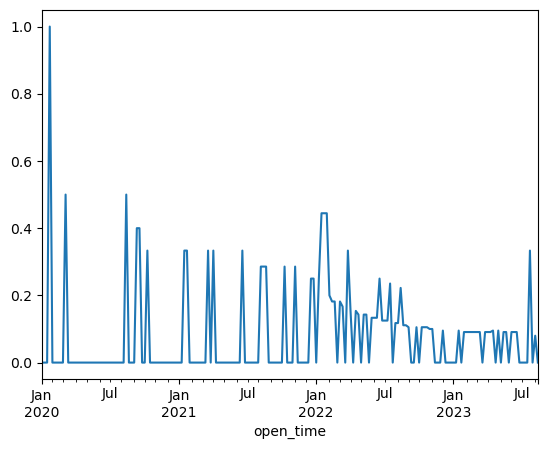

In [14]:
to.plot()

In [15]:
to.mean()

0.0799888549775522

In [7]:
# CALCULATE QUINTILE RETURNS

import pandas as pd

quintile_returns = {}

for quintile in range(1, 6):
    quintile_weights_q = quintile_weights[quintile_data == quintile]
    quintile_returns[quintile] = (quintile_weights_q * close_price_pct_change.shift(1)).sum(axis=1)

quintile_returns_df = pd.DataFrame(quintile_returns)
print(quintile_returns_df)

                   1         2         3         4         5
open_time                                                   
2020-01-05  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-12  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-19  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-26  0.210495  0.308027  0.142804  0.204133  0.171538
2020-02-02 -0.083473 -0.059457 -0.070982 -0.094233 -0.083230
...              ...       ...       ...       ...       ...
2023-07-16 -0.021202 -0.056083 -0.039870 -0.055398 -0.024890
2023-07-23  0.059679  0.069853  0.074726  0.097384  0.066275
2023-07-30 -0.021901 -0.005043 -0.022534 -0.041934  0.022677
2023-08-06  0.017686 -0.010451 -0.000625 -0.009498  0.012880
2023-08-13 -0.051160 -0.041261 -0.052548 -0.044285 -0.044196

[189 rows x 5 columns]


Axes(0.125,0.11;0.775x0.77)


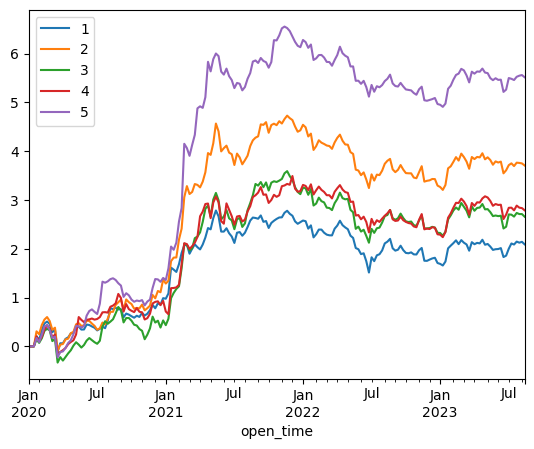

In [8]:
sum_of_columns = quintile_returns_df.cumsum().plot()
print(sum_of_columns)

In [9]:
def get_stats_for_all_quintiles(quintile_returns_df):
    stats_dict = {}
    
    for column in quintile_returns_df.columns:
        strat_ret = quintile_returns_df[column]
        stats = {}
        stats['SR'] = strat_ret.mean() / strat_ret.std() * np.sqrt(252)
        stats['ret'] = strat_ret.mean() * 252
        stats['vol'] = strat_ret.std() * np.sqrt(252)
        stats_dict[column] = stats
    
    return pd.DataFrame(stats_dict)

quintile_stats_df = get_stats_for_all_quintiles(quintile_returns_df[5]-quintile_returns_df[1])
print(quintile_stats_df)

            1         2         3         4         5
SR   1.555097  2.158741  1.614615  1.674715  2.632260
ret  2.788966  4.944312  3.545087  3.719108  7.355663
vol  1.793435  2.290368  2.195623  2.220741  2.794429


In [16]:
getcwd()

NameError: name 'getcwd' is not defined